In [2]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import  mnist
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from keras import Sequential
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [3]:
data = tf.keras.datasets.cifar10
((X_train, y_train),
 (X_test, y_test)) = (data.load_data())

print(X_train.shape)

X_train = (X_train/255.0).astype('float32')
X_test = (X_test/255.0).astype('float32')

print(X_train.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [4]:
model = Sequential([
 layers.InputLayer(shape=(32, 32, 3)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(32, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(32, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(10, activation='linear')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,866 (444.79 KB)

 Trainable params: 113,866 (444.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

history = model.fit(
 X_train, y_train, epochs = 10
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.2483 - loss: 1.9656
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4340 - loss: 1.5317
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4960 - loss: 1.3828
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5362 - loss: 1.2922
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5694 - loss: 1.2154
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5845 - loss: 1.1724
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6047 - loss: 1.1294
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6156 - loss: 1.1014
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6243 - loss: 1.0797
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6343 - loss: 1.0465


In [6]:
prediction = model.predict(X_test, batch_size = 128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [7]:
# plt.plot(
#  history.history['accuracy'], color = 'red', label = 'accuracy')
# plt.plot(
#  history.history['val_accuracy'], color = 'blue', label ='val_accuracy')

In [8]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6661 - loss: 0.9613


[0.9666165113449097, 0.6722999811172485]

In [9]:
y_pred = [np.argmax(ele) for ele in prediction]
y_pred = np.array(y_pred)
# print(y_pred)
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      1000
           1       0.90      0.70      0.79      1000
           2       0.56      0.52      0.54      1000
           3       0.45      0.46      0.45      1000
           4       0.62      0.58      0.60      1000
           5       0.56      0.67      0.61      1000
           6       0.76      0.78      0.77      1000
           7       0.74      0.72      0.73      1000
           8       0.77      0.79      0.78      1000
           9       0.71      0.83      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000


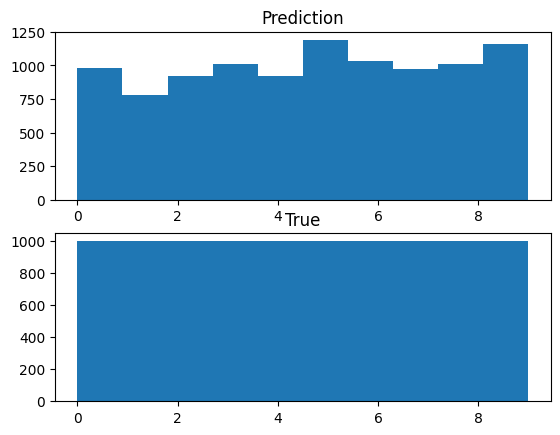

In [10]:
fig, ax = plt.subplots(2, 1)

ax[0].hist(y_pred.reshape(-1, ))
ax[0].title.set_text("Prediction")

ax[1].hist(y_test.reshape(-1, ))
ax[1].title.set_text("True")

In [11]:
prediction.shape

(10000, 10)